# Investigating Data Sets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analysis we are going to be investigating and trying to find possible correlations between three different sets of data. These sets of data are **Income Per Person(Per Country)**, **Life Expectancy(Per Country)**, and **Energy Use Per Person(Per Country)**. All data was collected by [Gapminder World](https://www.gapminder.org/data/). The three data sets are included in [this GitHub repository](https://github.com/TrikerDev/Investigating-Data-Sets) in CSV format for further viewing. The analysis of these data sets is to find potential correlation between different data points. This is all tentative information and **correlation does not equal causation**.

## Questions to Answer

>* Does increased income per person equate to higher life expectancy?
>* Does increased energy usage per person equate to higher life expectancy?
>* Does increased income per person equate to higher energy usage per person?

### My Predictions
> Personally, I predict that all three of these data sets will have a positive correlation with one another. As in, higher income leads to higher life expectancy. Higher life expectancy leads to higher energy usage, etc. I predict each data set will have a positive correlation with every other data set. I am investigating this to see if my predictions and those correlations could potentially be true.

In [292]:
# Importing packages to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [293]:
# Loading in the CSV data
income = pd.read_csv('income_per_person.csv')
life = pd.read_csv('life_expectancy_years.csv')
energy = pd.read_csv('energy_use_per_person.csv')

In [294]:
# Reading a few lines from the Life Expectancy table
life.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [295]:
# Reading a few lines from the Income per Person table
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [296]:
# Reading a few lines from the Energy Use per Person table
energy.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,1080.0,1070.0,1150.0,1110.0,1140.0,1230.0,1250.0,1330.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,459.0,472.0,492.0,515.0,521.0,522.0,552.0,534.0,545.0,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1730.0,1740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1850.0,1860.0,1940.0,1870.0,1930.0,1950.0,1940.0,1970.0,2030.0,NaN


> Now, there are **A LOT** of data points here. These will be narrowed down and cleaned up later. First, we are going to display these uncleaned data points in a few different ways to get a few different views.

In [297]:
# Describing the Life Expectancy table in a different way to get data points such as Mean, Standard Deviation, Max, etc.
life.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,83.758152,83.87663,83.996196,84.119022,84.236957,84.358152,84.478804,84.593478,84.71087,84.829891
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,5.600794,5.59444,5.589074,5.577601,5.570850,5.566060,5.556903,5.550234,5.54055,5.532609
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,67.100000,67.30000,67.400000,67.500000,67.600000,67.700000,67.800000,67.900000,68.00000,68.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,79.500000,79.70000,79.800000,79.900000,80.075000,80.200000,80.375000,80.475000,80.57500,80.775000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.200000,84.35000,84.450000,84.550000,84.650000,84.750000,84.850000,85.000000,85.15000,85.250000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,88.125000,88.22500,88.325000,88.500000,88.600000,88.700000,88.800000,88.900000,89.00000,89.100000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.700000,93.90000,94.000000,94.100000,94.200000,94.300000,94.400000,94.500000,94.70000,94.800000


In [298]:
# Describing the Income table in a different way to get data points such as Mean, Standard Deviation, Max, etc.
income.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,978.523316,978.948187,980.725389,980.922280,981.911917,982.502591,982.829016,985.419689,980.937824,982.393782,...,23142.378238,23613.119171,24083.461140,24577.430052,25077.678756,25576.476684,26107.564767,26635.953368,27180.512953,27730.725389
std,579.633227,579.915248,582.565512,582.032626,583.963199,584.043985,584.097850,590.514505,578.200194,581.878397,...,23670.673835,24162.379036,24635.072766,25136.440969,25646.475260,26138.360102,26707.571366,27233.418469,27813.430077,28356.570830
min,250.000000,250.000000,249.000000,249.000000,249.000000,249.000000,248.000000,248.000000,248.000000,248.000000,...,557.000000,566.000000,577.000000,588.000000,600.000000,612.000000,625.000000,637.000000,650.000000,664.000000
25%,592.000000,592.000000,592.000000,592.000000,592.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,5180.000000,5280.000000,5380.000000,5490.000000,5600.000000,5710.000000,5830.000000,5950.000000,6070.000000,6190.000000
50%,817.000000,822.000000,826.000000,831.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,...,15400.000000,15700.000000,16000.000000,16400.000000,16700.000000,17000.000000,17400.000000,17700.000000,18100.000000,18500.000000
75%,1160.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1160.000000,1170.000000,...,34200.000000,34800.000000,35500.000000,36200.000000,37000.000000,37700.000000,38500.000000,39300.000000,40100.000000,40900.000000
max,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,149000.000000,153000.000000,156000.000000,159000.000000,162000.000000,165000.000000,169000.000000,172000.000000,176000.000000,179000.000000


In [299]:
# Describing the Energy table in a different way to get data points such as Mean, Standard Deviation, Max, etc.
energy.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,25.000000,25.000000,25.000000,25.000000,25.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,167.000000,167.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,131.000000,34.000000
mean,2291.800000,2325.800000,2421.960000,2554.360000,2665.280000,2700.038462,2772.230769,2844.230769,3029.615385,3212.230769,...,2219.385928,2228.555449,2581.620438,2470.408759,2556.321168,2540.919708,2552.136496,2529.178102,2580.040458,4180.294118
std,2111.839561,2096.769718,2083.526247,2109.977624,2222.873807,2161.118812,2115.409451,2111.165409,2236.114972,2375.453899,...,2823.620956,2834.985797,2984.181246,2867.183873,2947.257429,2980.009828,3008.272882,2994.200788,3037.373448,2819.526594
min,289.000000,322.000000,350.000000,368.000000,410.000000,441.000000,452.000000,484.000000,497.000000,512.000000,...,9.550000,9.560000,128.000000,130.000000,135.000000,113.000000,63.700000,65.400000,66.300000,1540.000000
25%,1320.000000,1400.000000,1410.000000,1450.000000,1520.000000,1450.000000,1517.500000,1732.500000,1895.000000,2022.500000,...,488.000000,511.000000,594.000000,609.000000,670.000000,661.000000,685.000000,660.000000,687.000000,2617.500000
50%,1830.000000,1890.000000,2050.000000,2180.000000,2320.000000,2310.000000,2340.000000,2320.000000,2460.000000,2655.000000,...,1030.000000,1060.000000,1460.000000,1380.000000,1450.000000,1550.000000,1580.000000,1490.000000,1560.000000,3560.000000
75%,2700.000000,2740.000000,2890.000000,3080.000000,3210.000000,3277.500000,3250.000000,3307.500000,3545.000000,3692.500000,...,2875.000000,2850.000000,3360.000000,3150.000000,3310.000000,3100.000000,3080.000000,3070.000000,3030.000000,4997.500000
max,10500.000000,10500.000000,10400.000000,10500.000000,11200.000000,10900.000000,10500.000000,10400.000000,11100.000000,12000.000000,...,19200.000000,18200.000000,16400.000000,16900.000000,17000.000000,18200.000000,17600.000000,18200.000000,17900.000000,17500.000000


In [300]:
# Info to give basic information such as amount of columns and rows of life expectancy table
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 441.3+ KB


In [301]:
# Info to give basic information such as amount of columns and rows of income table
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [302]:
# Info to give basic information such as amount of columns and rows of energy table
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  169 non-null    object 
 1   1960     25 non-null     float64
 2   1961     25 non-null     float64
 3   1962     25 non-null     float64
 4   1963     25 non-null     float64
 5   1964     25 non-null     float64
 6   1965     26 non-null     float64
 7   1966     26 non-null     float64
 8   1967     26 non-null     float64
 9   1968     26 non-null     float64
 10  1969     26 non-null     float64
 11  1970     26 non-null     float64
 12  1971     109 non-null    float64
 13  1972     109 non-null    float64
 14  1973     109 non-null    float64
 15  1974     109 non-null    float64
 16  1975     109 non-null    float64
 17  1976     109 non-null    float64
 18  1977     109 non-null    float64
 19  1978     109 non-null    float64
 20  1979     109 non-null    float64
 21  1980     109 non

### Data Cleaning

> First off, we are going to narrow down the countries to something more manageable. I am going to choose 15 countries just for a nice round number to do an analysis on. I am choosing some countries from all over the world to try and get a fairly equal number of representation from around the world. These countries will be **Australia**, **Belgium**, **Brazil**, **Canada**, **China**, **Egypt**, **France**, **Germany**, **Iceland**, **Ireland**, **Jamaica**, **Japan**, **Turkey**, **United Kingdom**, and **United States**.

> Second, we are trying to find correlation between data that has already been collected, not predict future data points, so the cutoff date was going to be 2019, as I am making this analysis in 2020. However, the Energy table only has data collected up to **2015**, so that will be the ending date for our data sets. The beginning dates for the analysis will be **1960**, as that is the date the Energy table starts at. The other tables start before 1960 and extend after 2015, but there would be no data for energy usage before or after those dates, and we are trying to find correlations between data points. Therefore our data range will be **1960-2015**.

> Our first step is going to be narrowing down our countries in all three tables to just our chosen 15 countries.

In [303]:
# Creating a new life table of only our selected countries
narrowed_life = life[(life['country'] == 'Australia') | (life['country'] == 'Belgium') | (life['country'] == 'Brazil') | (life['country'] == 'Canada')
           | (life['country'] == 'China') | (life['country'] == 'Egypt') | (life['country'] == 'France') | (life['country'] == 'Germany')
           | (life['country'] == 'Iceland') | (life['country'] == 'Ireland') | (life['country'] == 'Jamaica') | (life['country'] == 'Japan')
           | (life['country'] == 'Turkey') | (life['country'] == 'United Kingdom') | (life['country'] == 'United States')]
print(narrowed_life)

            country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
8         Australia  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0   
16          Belgium  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.1  40.1   
23           Brazil  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0   
30           Canada  39.0  39.0  39.0  39.0  39.0  39.0  39.0  39.0  39.0   
35            China  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0   
51            Egypt  33.0  33.0  33.0  33.0  33.0  33.0  33.0  33.0  33.0   
59           France  34.0  36.4  34.4  30.6  29.4  34.9  35.0  34.2  34.5   
63          Germany  38.4  38.4  38.4  38.4  38.4  38.4  38.4  38.4  38.4   
74          Iceland  42.9  33.9  27.6  19.6  24.8  30.9  45.8  43.6  43.5   
79          Ireland  38.3  38.3  38.3  38.3  38.3  38.3  38.3  38.3  38.3   
82          Jamaica  34.2  34.2  34.2  34.2  34.2  34.2  34.2  34.2  34.2   
83            Japan  36.4  36.4  36.4  36.4  36.4  36.4  36.4  36.4  36.4   

In [304]:
# Creating a new energy table of only our selected countries
narrowed_energy = energy[(energy['country'] == 'Australia') | (energy['country'] == 'Belgium') | (energy['country'] == 'Brazil') | (energy['country'] == 'Canada')
           | (energy['country'] == 'China') | (energy['country'] == 'Egypt') | (energy['country'] == 'France') | (energy['country'] == 'Germany')
           | (energy['country'] == 'Iceland') | (energy['country'] == 'Ireland') | (energy['country'] == 'Jamaica') | (energy['country'] == 'Japan')
           | (energy['country'] == 'Turkey') | (energy['country'] == 'United Kingdom') | (energy['country'] == 'United States')]
print(narrowed_energy)

            country    1960    1961    1962    1963    1964    1965    1966  \
6         Australia  3060.0  3120.0  3170.0  3280.0  3350.0  3460.0  3550.0   
14          Belgium  2520.0  2570.0  2810.0  3040.0  3020.0  3120.0  3050.0   
21           Brazil     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
26           Canada  4250.0  4310.0  4450.0  4690.0  4900.0  5150.0  5270.0   
29            China     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
45            Egypt     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
53           France  1700.0  1750.0  1860.0  1980.0  2090.0  2110.0  2120.0   
57          Germany  1950.0  1990.0  2120.0  2280.0  2340.0  2380.0  2390.0   
67          Iceland  3080.0  2920.0  3030.0  3280.0  3310.0  3440.0  3640.0   
72          Ireland  1320.0  1400.0  1410.0  1450.0  1520.0  1510.0  1630.0   
75          Jamaica     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
76            Japan   874.0   963.0  1000.0  1140.0 

In [305]:
# Creating a new income table of only our selected countries
narrowed_income = income[(income['country'] == 'Australia') | (income['country'] == 'Belgium') | (income['country'] == 'Brazil') | (income['country'] == 'Canada')
           | (income['country'] == 'China') | (income['country'] == 'Egypt') | (income['country'] == 'France') | (income['country'] == 'Germany')
           | (income['country'] == 'Iceland') | (income['country'] == 'Ireland') | (income['country'] == 'Jamaica') | (income['country'] == 'Japan')
           | (income['country'] == 'Turkey') | (income['country'] == 'United Kingdom') | (income['country'] == 'United States')]
print(narrowed_income)

            country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
8         Australia   817   822   826   831   836   841   845   850   855   
16          Belgium  2390  2390  2390  2400  2400  2400  2410  2410  2410   
23           Brazil  1120  1120  1120  1120  1120  1120  1120  1120  1120   
30           Canada  1310  1320  1330  1340  1350  1360  1360  1370  1380   
35            China   736   735   733   732   730   729   727   726   724   
51            Egypt  1590  1600  1600  1600  1600  1600  1600  1600  1600   
59           France  1850  1850  1850  1850  1850  1850  1850  1850  1860   
63          Germany  1990  2010  2020  2040  2050  2070  2080  2100  2110   
74          Iceland   926   926   927   927   927   927   927   927   927   
79          Ireland  1460  1470  1480  1490  1500  1510  1520  1530  1550   
82          Jamaica  1360  1360  1360  1360  1360  1360  1360  1360  1360   
83            Japan  1010  1010  1010  1010  1010  1020  1020  1020  1020   

> Our next step is going to be narrowing down our tables to just have dates between 1960-2015.

In [306]:
# Getting the country column and the date columns, then combining them into one table for Life Expectancy
country_life = narrowed_life.loc[:,'country']
dates_life = narrowed_life.loc[:,'1960':'2015']
life_frames = [country_life,dates_life]
final_life = pd.concat(life_frames,axis=1)
print(final_life)
final_life.head()

            country  1960  1961  1962  1963  1964  1965  1966  1967  1968  \
8         Australia  71.1  71.4  71.2  71.2  70.9  71.2  71.0  71.3  71.0   
16          Belgium  69.7  70.6  70.3  70.1  70.8  70.6  70.7  71.0  70.7   
23           Brazil  56.1  56.6  57.1  57.6  58.0  58.5  58.9  59.3  59.7   
30           Canada  71.0  71.3  71.3  71.3  71.7  71.8  71.9  72.1  72.3   
35            China  31.6  34.0  44.4  51.8  53.2  55.5  56.7  58.3  59.3   
51            Egypt  46.9  47.5  48.0  48.4  48.9  49.3  49.7  50.0  50.3   
59           France  70.6  71.2  70.7  70.5  71.5  71.3  71.7  71.7  71.7   
63          Germany  69.4  70.0  70.1  70.2  70.8  70.8  70.9  71.1  70.8   
74          Iceland  74.0  73.4  73.6  72.9  73.5  73.8  73.2  73.7  73.9   
79          Ireland  70.4  69.9  70.2  70.5  70.7  70.9  70.4  71.5  71.2   
82          Jamaica  65.2  65.8  66.3  66.8  67.3  67.7  68.1  68.4  68.8   
83            Japan  68.3  69.0  69.3  70.3  70.8  70.9  71.7  72.0  72.3   

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
8,Australia,71.1,71.4,71.2,71.2,70.9,71.2,71.0,71.3,71.0,...,81.4,81.4,81.5,81.7,82.0,82.1,82.5,82.6,82.5,82.5
16,Belgium,69.7,70.6,70.3,70.1,70.8,70.6,70.7,71.0,70.7,...,79.6,79.6,79.6,79.8,80.1,80.2,80.3,80.5,80.9,80.9
23,Brazil,56.1,56.6,57.1,57.6,58.0,58.5,58.9,59.3,59.7,...,73.5,73.7,74.0,74.2,74.4,74.5,74.9,75.1,75.3,75.5
30,Canada,71.0,71.3,71.3,71.3,71.7,71.8,71.9,72.1,72.3,...,80.6,80.7,80.8,81.1,81.4,81.7,81.7,81.9,81.8,81.7
35,China,31.6,34.0,44.4,51.8,53.2,55.5,56.7,58.3,59.3,...,74.9,75.4,75.4,75.7,75.8,76.0,76.2,76.5,76.5,76.5


In [307]:
# Getting the country column and the date columns, then combining them into one table for Income per Person
country_income = narrowed_income.loc[:,'country']
dates_income = narrowed_income.loc[:,'1960':'2015']
income_frames = [country_income,dates_income]
final_income = pd.concat(income_frames,axis=1)
print(final_income)
final_income.head()

            country   1960   1961   1962   1963   1964   1965   1966   1967  \
8         Australia  16000  15700  16300  16900  17700  18200  18300  19100   
16          Belgium  11400  11900  12500  13000  13800  14200  14600  15200   
23           Brazil   4400   4650   4810   4700   4720   4700   4870   4940   
30           Canada  14800  14900  15700  16200  16900  17700  18500  18700   
35            China    843    560    569    638    715    774    829    722   
51            Egypt   2640   2740   2840   2950   3060   3170   3100   2980   
59           France  12200  12700  13300  13800  14500  15100  15700  16400   
63          Germany  15600  16000  16600  16900  17800  18500  18900  18900   
74          Iceland  10100   9940  10600  11600  12600  13300  14300  13900   
79          Ireland   8660   9090   9320   9660   9960  10100  10100  10600   
82          Jamaica   5160   5260   5300   5360   5650   5970   6080   6170   
83            Japan   6270   6970   7530   8100   89

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
8,Australia,16000,15700,16300,16900,17700,18200,18300,19100,19800,...,39500,40700,41400,41300,41500,42000,42800,43200,43700,44100
16,Belgium,11400,11900,12500,13000,13800,14200,14600,15200,15800,...,40500,41600,41600,40400,41100,41300,41100,41000,41300,41800
23,Brazil,4400,4650,4810,4700,4720,4700,4870,4940,5270,...,12700,13300,13900,13700,14600,15100,15200,15500,15500,14800
30,Canada,14800,14900,15700,16200,16900,17700,18500,18700,19300,...,41200,41600,41600,39900,40700,41600,41800,42400,43100,43100
35,China,843,560,569,638,715,774,829,722,671,...,6390,7260,7930,8630,9500,10400,11100,11900,12700,13500


In [308]:
# Getting the country column and the date columns, then combining them into one table for Energy Use per Person
country_energy = narrowed_energy.loc[:,'country']
dates_energy = narrowed_energy.loc[:,'1960':'2015']
energy_frames = [country_energy,dates_energy]
final_energy = pd.concat(energy_frames,axis=1)
print(final_energy)
final_energy.head()

            country    1960    1961    1962    1963    1964    1965    1966  \
6         Australia  3060.0  3120.0  3170.0  3280.0  3350.0  3460.0  3550.0   
14          Belgium  2520.0  2570.0  2810.0  3040.0  3020.0  3120.0  3050.0   
21           Brazil     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
26           Canada  4250.0  4310.0  4450.0  4690.0  4900.0  5150.0  5270.0   
29            China     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
45            Egypt     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
53           France  1700.0  1750.0  1860.0  1980.0  2090.0  2110.0  2120.0   
57          Germany  1950.0  1990.0  2120.0  2280.0  2340.0  2380.0  2390.0   
67          Iceland  3080.0  2920.0  3030.0  3280.0  3310.0  3440.0  3640.0   
72          Ireland  1320.0  1400.0  1410.0  1450.0  1520.0  1510.0  1630.0   
75          Jamaica     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
76            Japan   874.0   963.0  1000.0  1140.0 

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6,Australia,3060.0,3120.0,3170.0,3280.0,3350.0,3460.0,3550.0,3690.0,3760.0,...,5710.0,5870.0,5960.0,5860.0,5790.0,5750.0,5580.0,5470.0,5330.0,5480.0
14,Belgium,2520.0,2570.0,2810.0,3040.0,3020.0,3120.0,3050.0,3180.0,3590.0,...,5470.0,5340.0,5450.0,5200.0,5540.0,5090.0,4850.0,5000.0,4710.0,4690.0
21,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1180.0,1240.0,1290.0,1240.0,1360.0,1370.0,1410.0,1460.0,1500.0,NaN
26,Canada,4250.0,4310.0,4450.0,4690.0,4900.0,5150.0,5270.0,5560.0,5870.0,...,8240.0,8210.0,8190.0,7800.0,7790.0,7910.0,7730.0,7740.0,7900.0,7630.0
29,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1520.0,1630.0,1670.0,1780.0,1950.0,2090.0,2160.0,2210.0,2240.0,NaN


> Now at the end of all this cleaning and organizing, we have three tables with clear and concise data, all covering the same locations over the same timeframe.

<a id='eda'></a>
## Exploratory Data Analysis

### Does increased income per person equate to a higher life expectancy?

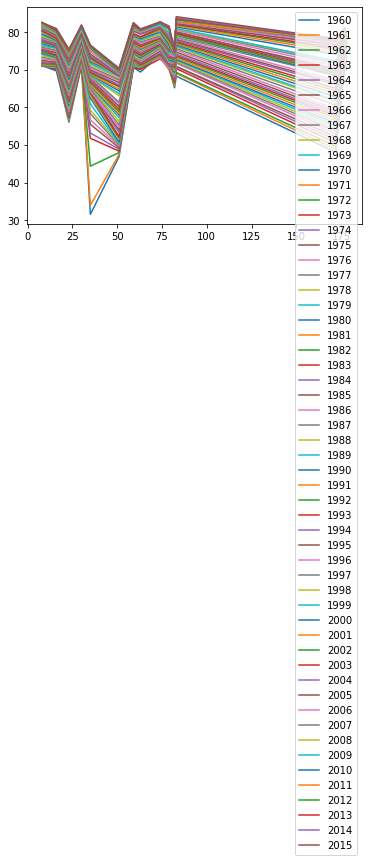

In [ ]:
final_life.plot()
final_income.plot()
final_energy.plot()

### Does a higher life expectancy correlate to a higher energy usage?

### How do all three variables (Life Expectancy, Income per Person, and Energy Usage per Person correlate to eachother?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])